In [1]:
%matplotlib inline
#%matplotlib widget


In [2]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
from ipywidgets import HBox, Textarea, interact

In [3]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames

In [61]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
expSumPassive=expSumPassive[(expSumPassive['bots']==8)]
suffix='_distances.csv'
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged'
close_threshold=140**2
too_close_thresh=100**2
countdf=pd.DataFrame()
bottypes=['fronter','aligner']
for bottype in bottypes:
    relevant_table=expSumPassive[(expSumPassive['bottype']==bottype)]
    for index,row in relevant_table.iterrows():
        FileName=row.locatingFileNamePack
        srtarting_frame=read_time(row.start_min)
        data=pd.read_csv(passive_path+FileName+suffix,index_col=0)
        relevant_data=data.iloc[srtarting_frame:len(data)]
        relevant_data=relevant_data.reset_index()
        cond = (relevant_data.distance_sq<=close_threshold)&(relevant_data.distance_sq>too_close_thresh)
        dataCond = relevant_data[cond]
        dataCG=dataCond.groupby(['frame'], as_index=True).count()
        dataCG.to_csv(passive_path+'\\dataCG_test.csv')
        countdf=pd.concat((countdf,dataCG.distance_sq.rename(FileName)),axis=1)
        countdf.to_csv(passive_path+'\\countdf_test.csv')
countdf.fillna(0,inplace=True)

KeyboardInterrupt: 

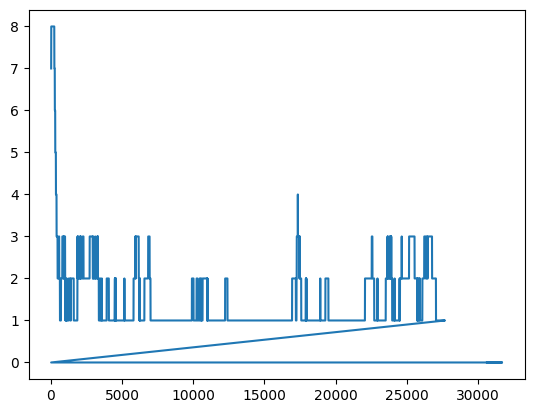

In [57]:
plt.plot(countdf.iloc[:,0])
#plt.plot(countdf.iloc[:,2],markeredgecolor='olive',marker='o',alpha=0.4,markerfacecolor='none',markeredgewidth=.1)
#plt.plot(countdf.iloc[:,5:10],markeredgecolor='cyan',marker='o',alpha=0.4,markerfacecolor='none',markeredgewidth=.1)
#column_names = list(countdf.columns.values)
#plt.axis([12500,20000,0,4])
#plt.legend(column_names)
#plt.axis([1000,1300,-1,8])

In [21]:
fronters_count=countdf.iloc[:,0:4]
fronter_mean=fronters_count.mean(axis = 1)
alingers_count=countdf.iloc[:,5:10]
alingers_mean=alingers_count.mean(axis = 1)

In [28]:
fronter_mean[500]

3.0

(100.0, 30000.0, 0.9, 10.0)

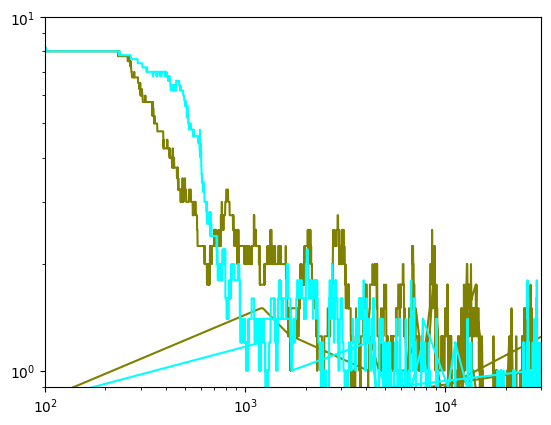

In [22]:
plt.loglog(fronter_mean,color='olive')
plt.loglog(alingers_mean,color='cyan')

plt.axis([1E2,3E4,0.9,10])

In [45]:
start_min=expSumPassive.start_min

In [ ]:
start_min

In [1]:
plt.plot(countdf.iloc[:,0],markeredgecolor='olive',marker='o',alpha=0.4,markerfacecolor='none',markeredgewidth=.1)

NameError: name 'plt' is not defined

## mean according to second

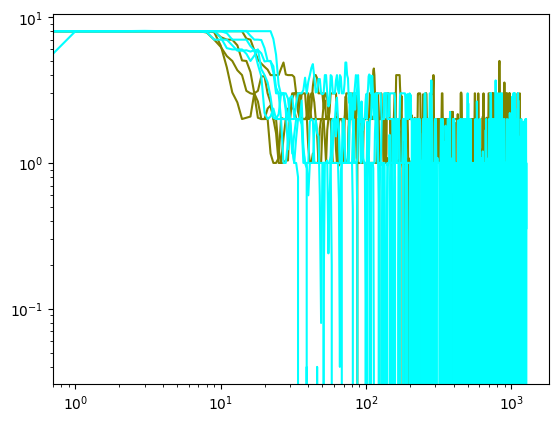

In [73]:
fronters_count_mean=fronters_count.groupby(np.arange(len(fronters_count))//(25)).mean()
alingers_count_mean=alingers_count.groupby(np.arange(len(alingers_count))//(25)).mean()
plt.loglog(fronters_count_mean,color='olive')
plt.loglog(alingers_count_mean,color='cyan')

## mean according to mooving 

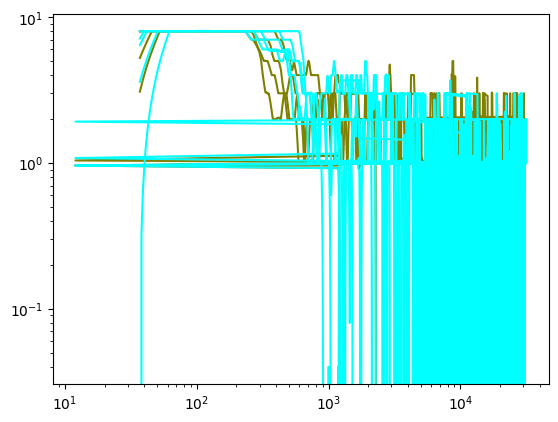

In [52]:
fronters_count_mean_window=fronters_count.rolling(25).mean()
alingers_count_mean_window=alingers_count.rolling(25).mean()
plt.loglog(fronters_count_mean_window,color='olive')
plt.loglog(alingers_count_mean_window,color='cyan')